Step-1 Import Libraries And Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path
df = pd.read_csv(Path('..') / 'data' / 'college_student_placement_dataset.csv')
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [3]:
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [5]:
# For find Null values for each column
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

Step-2 Separate Numeraical and Categorical Columns

In [6]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols,categorical_cols

(Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
        'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed'],
       dtype='object'),
 Index(['College_ID', 'Internship_Experience', 'Placement'], dtype='object'))

In [7]:
df[numerical_cols].describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [8]:
df[numerical_cols].mean()

IQ                        99.471800
Prev_Sem_Result            7.535673
CGPA                       7.532379
Academic_Performance       5.546400
Extra_Curricular_Score     4.970900
Communication_Skills       5.561800
Projects_Completed         2.513400
dtype: float64

Step-3 Plot Distribution

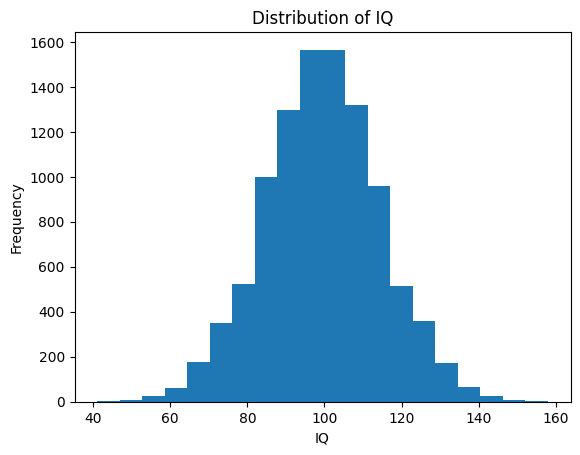

In [9]:
# IQ distribution
plt.figure()
plt.hist(df['IQ'], bins=20)
plt.xlabel("IQ")
plt.ylabel("Frequency")
plt.title("Distribution of IQ")
plt.show()  

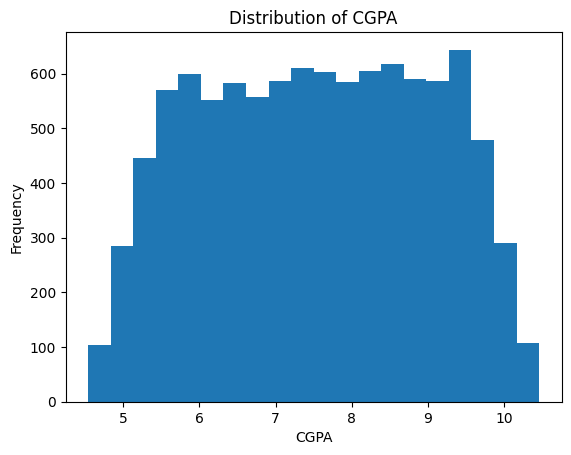

In [10]:
# CGPA distribution
plt.figure()
plt.hist(df['CGPA'], bins=20)
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.title("Distribution of CGPA")
plt.show() 

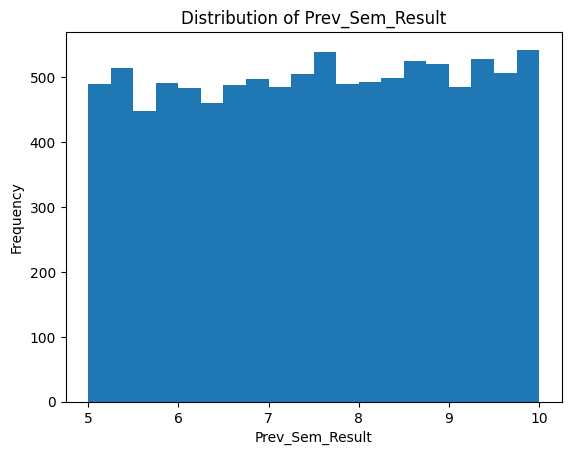

In [11]:
# Prev_Sem_Result distribution
plt.figure()
plt.hist(df['Prev_Sem_Result'], bins=20)
plt.xlabel("Prev_Sem_Result")
plt.ylabel("Frequency")
plt.title("Distribution of Prev_Sem_Result")
plt.show() 

Correlation Heatmap

In [12]:
corr_matrix = df[numerical_cols].corr()
corr_matrix

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.003458,-0.010896,0.014538
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434
CGPA,-0.002859,0.980768,1.000000,-0.002958,0.011441,-0.018242,0.020872
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.011774,-0.019733,-0.013148
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,1.000000,0.003769,0.008122
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,0.003769,1.000000,-0.004486
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,0.008122,-0.004486,1.000000


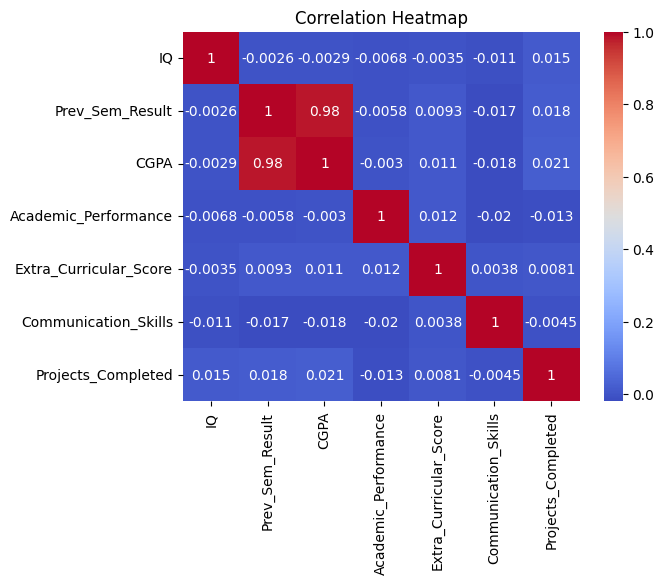

In [13]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

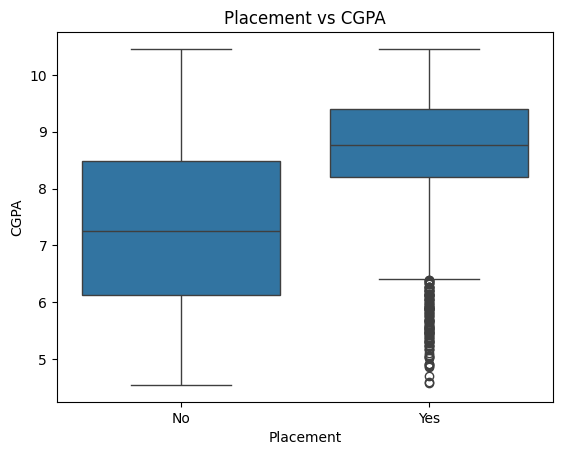

In [14]:
sns.boxplot(x='Placement',y='CGPA',data=df)
plt.title("Placement vs CGPA")
plt.show()

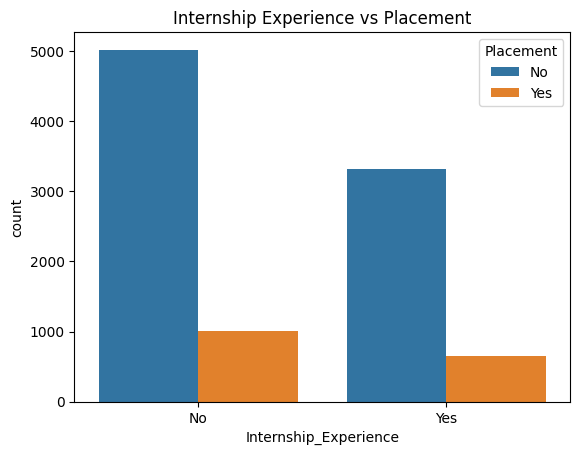

In [15]:
sns.countplot(x='Internship_Experience', hue='Placement', data=df)
plt.title("Internship Experience vs Placement")
plt.show()


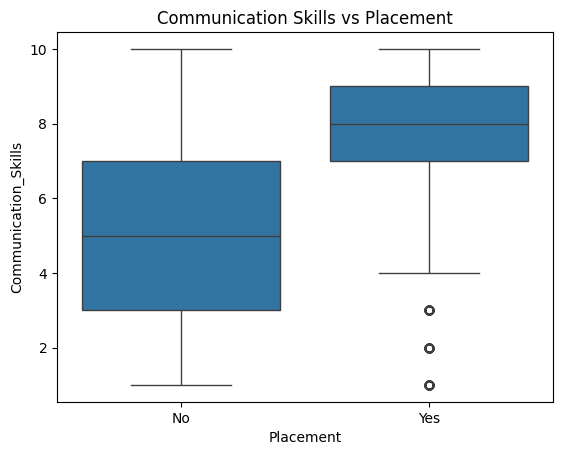

In [16]:

sns.boxplot(x='Placement', y='Communication_Skills', data=df)
plt.title("Communication Skills vs Placement")
plt.show()


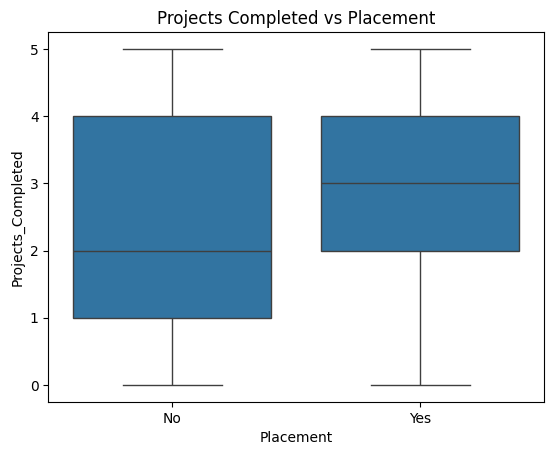

In [17]:

sns.boxplot(x='Placement', y='Projects_Completed', data=df)
plt.title("Projects Completed vs Placement")
plt.show()


<Axes: xlabel='CGPA', ylabel='IQ'>

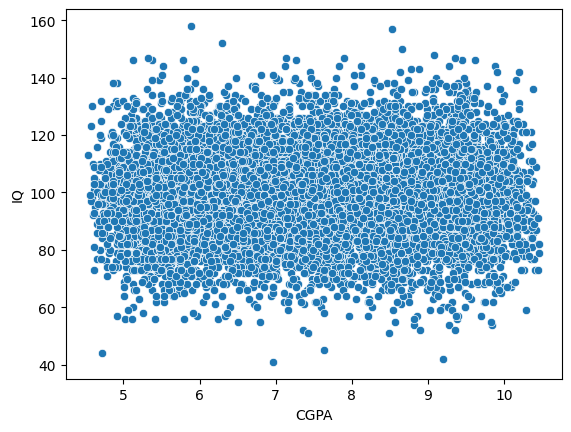

In [18]:
sns.scatterplot(x=df['CGPA'], y=df['IQ'])

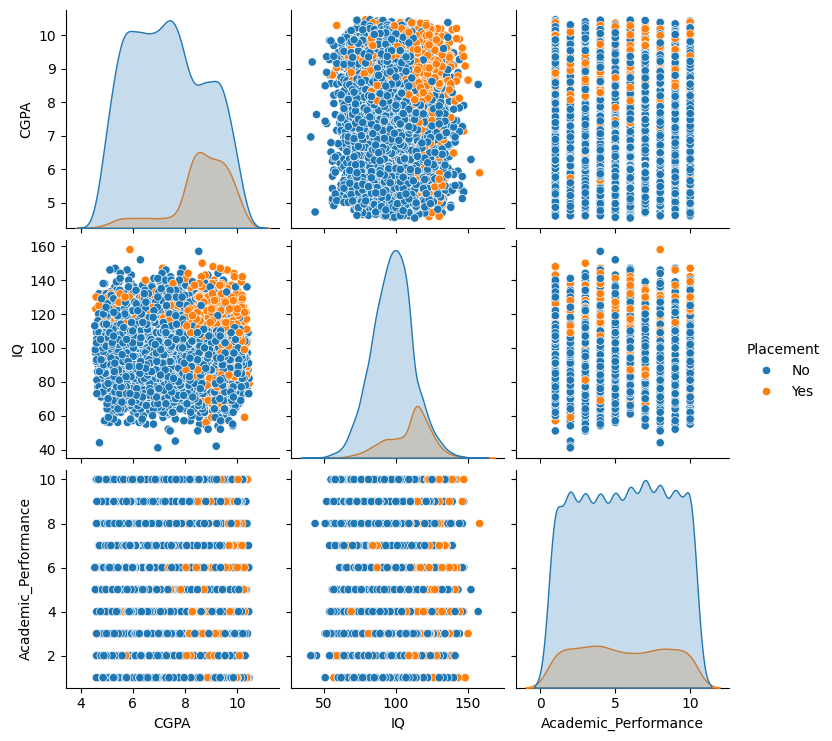

In [19]:
sns.pairplot(df[['CGPA', 'IQ', 'Academic_Performance', 'Placement']], hue='Placement', diag_kind='kde')